In [275]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import time
warnings.filterwarnings("ignore")

In [276]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=10):
      # Here i am initializing the perceptron with given learning rate and no of iterations
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.errors_ = []

    def initialize_weights(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def predict(self, X):
      # Here predicting based on dot product of input and weights plus bias
        Linear_Dot_Output = np.dot(X, self.weights) + self.bias
        # here return 1 for values >= 0, else return -1
        return np.where(Linear_Dot_Output >= 0, 1, -1)

    def update_weights(self, X, y):
      # Updating the weights based on training data for given no of iterations
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                predict = self.predict(xi)
                update = self.learning_rate * (target - predict)
                if update != 0.0:
                    self.weights += update * xi
                    self.bias += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def fit(self, X, y):
     # Fitting the perceptron to the training data
        n_feat = X.shape[1]
        self.initialize_weights(n_feat)
        self.update_weights(X, y)

In [277]:
class Adaline:
    def __init__(self, learning_rate=0.01, n_iter=10):
      # Here initializing Adaline with learning rate and no of iterations
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.cost_ = []

    def initialize_weights(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def fit(self, X, y):
      # Fitting the adaline to the training data
        n_feat = X.shape[1]
        self.initialize_weights(n_feat)

        for _ in range(self.n_iter):
          # Updating the weights based on training data for given no of iterations
            net_input = self.net_input(X)
            outputs = self.activation(X)
            errors = (y - outputs)
            self.weights += self.learning_rate * X.T.dot(errors)
            self.bias += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)



In [278]:
class SGD:
    def __init__(self, learning_rate=0.01, n_iter=10, shuffle=True):
      # Here initializing Adaline with learning rate and no of iterations
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.weights = None
        self.bias = None
        self.errors_ = []

    def initialize_weights(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def net_input(self, X):
      # Here predicting based on dot product of input and weights plus bias
        return np.dot(X, self.weights) + self.bias

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def _shuffle(self, X, y):
      r_shuffle = np.random.permutation(len(y))
      return X[r_shuffle], y[r_shuffle]


    def fit(self, X, y):
      # Fitting the sgd to the training data
        n_feat = X.shape[1]
        self.initialize_weights(n_feat)

        for _ in range(self.n_iter):
          # Updating the weights based on training data for given no of iterations
          if self.shuffle:
            X, y = self._shuffle(X, y)
          errors = 0
          for xi, target in zip(X, y):
            up_date = target - self.predict(xi)
            if up_date != 0:
              self.weights += self.learning_rate * up_date * xi
              self.bias += self.learning_rate * up_date
              errors += int(up_date != 0.0)
          self.errors_.append(errors)
        return self

In [279]:
def load_data(file_path):

    DCCC = pd.read_csv(file_path, header=None, na_values='?')
    # Here treat '?' as NaN and replaceing the NaN values with the mean of the column
    DCCC.fillna(DCCC.mean(), inplace=True)
    X = DCCC.iloc[:, :-1].values
    y = DCCC.iloc[:, -1].values
    # unique_vals = np.unique(y)
    # if len(unique_vals) > 2:
    #     y = np.where(y == y[0], -1, 1)
    # Here converting target to binary if necessary and ensureing X and y are the numpy arrays
    y = np.where(y == y[0], -1, 1)
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)
    return X, y

In [280]:
def calculate_accuracy(y_true, y_pred):
  # Here counting the no of true predictions and calculating the accuracy as the % of true predictions
    true_prediction = np.sum(y_true == y_pred)
    accuracy = true_prediction / len(y_true) * 100
    return accuracy

In [281]:
def main(classifier_name, data_file):
    X, y = load_data(data_file)
    # Loading and preprocessing dataset
    # Initializing the classifier with 100 iterations now handled internally in fit
    if classifier_name == 'perceptron':
        classifier = Perceptron(learning_rate=0.01, n_iter=100)
    elif classifier_name == 'adaline':
        classifier = Adaline(learning_rate=0.0001, n_iter=100)
    elif classifier_name == 'sgd':
        classifier = SGD(learning_rate=0.001, n_iter=100)

    classifier.fit(X, y)
    predictions_data = classifier.predict(X)
    accuracy_data = calculate_accuracy(predictions_data, y)
    print(f"Accuracy after final iteration = {accuracy_data}%")

    # Plotting accuracies or errors/costs once after fitting
    if hasattr(classifier, 'errors_'):
        plot_metrics(classifier.errors_, classifier_name, "Errors")
    elif hasattr(classifier, 'cost_'):
        plot_metrics(classifier.cost_, classifier_name, "Costs")

# Ensure classifiers' fit methods internally handle iterating 10 times correctly
def plot_metrics(metrics, classifier_name, metric_name="Metrics"):
    plt.plot(metrics, marker='o', linestyle='-', label=f'{classifier_name} - {metric_name}')
    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.title(f'{classifier_name} - {metric_name} over Epochs')
    plt.legend()
    plt.show()

def plot_accuracies(accuracies, classifier_name):
    plt.plot(accuracies, marker='o', label=classifier_name)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Iterations')
    plt.legend()
    plt.show()


Accuracy after final iteration = 100.0%


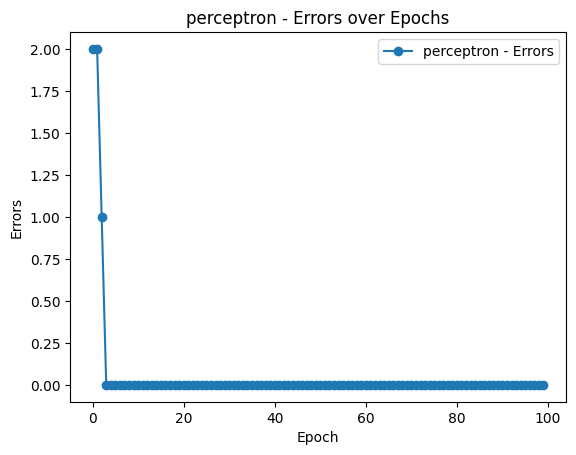

Accuracy after final iteration = 100.0%


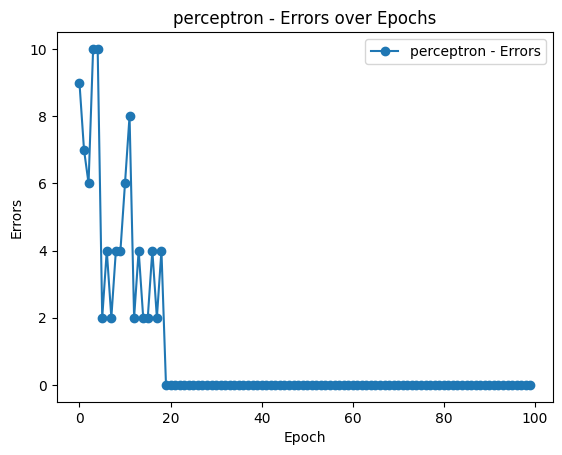

In [282]:
main('perceptron', 'iris.data')
main('perceptron', 'lung-cancer.data')

Accuracy after final iteration = 100.0%


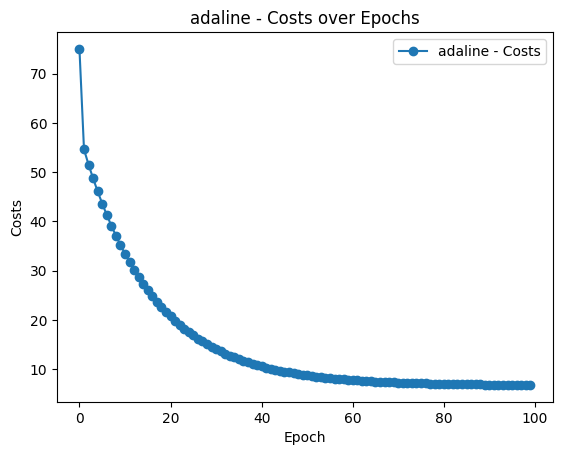

Accuracy after final iteration = 90.625%


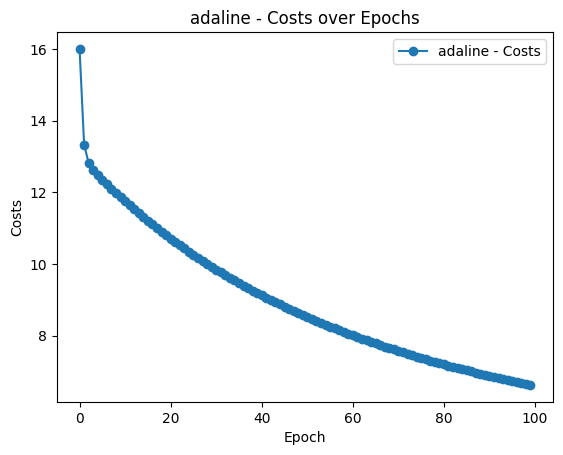

In [283]:
main('adaline', 'iris.data')
main('adaline', 'lung-cancer.data')

Accuracy after final iteration = 100.0%


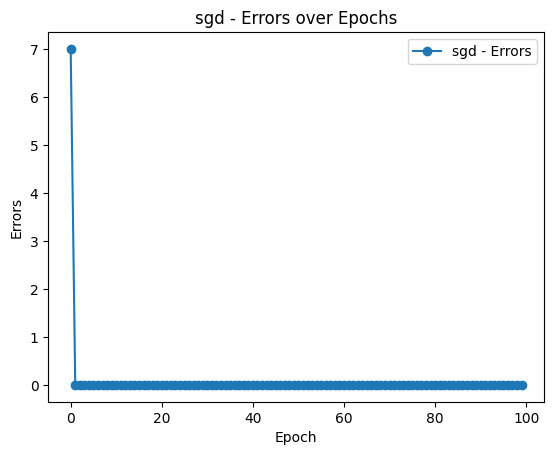

Accuracy after final iteration = 100.0%


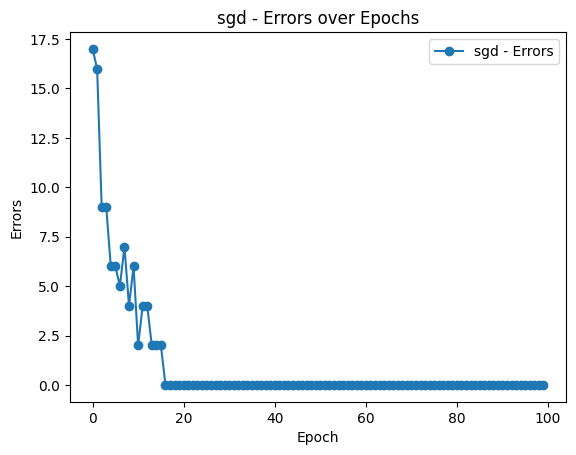

In [284]:
main('sgd', 'iris.data')
main('sgd', 'lung-cancer.data')

In [290]:
class BinarySGDClassifier:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias) >= 1
                if condition:
                    self.weights -= self.lr * (2 * self.weights / n_samples)
                else:
                    self.weights -= self.lr * ((2 * self.weights / n_samples) - np.dot(x_i, y_[idx]))
                    self.bias -= self.lr * y_[idx]

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return np.where(linear_model >= 0, 1, 0)

In [291]:
class OneVsRestClassifier:
    def __init__(self, base_classifier, learning_rate=0.01, epochs=1000):
        self.base_classifier = base_classifier
        self.classifiers = []
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.unique_classes = np.unique(y)
        for class_ in self.unique_classes:
            binary_y = np.where(y == class_, 1, -1)
            clf = self.base_classifier(learning_rate=self.learning_rate, epochs=self.epochs)
            clf.fit(X, binary_y)
            self.classifiers.append(clf)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.classifiers)))
        for i, clf in enumerate(self.classifiers):
            predictions[:, i] = clf.predict(X)
        return self.unique_classes[np.argmax(predictions, axis=1)]

In [292]:
def train_test_split(X, y, test_size=0.2):
    total_samples = X.shape[0]
    test_samples = int(total_samples * test_size)

    indices = np.random.permutation(total_samples)
    train_indices = indices[test_samples:]
    test_indices = indices[:test_samples]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

X_iris, y_iris = load_data('/content/iris.data')
X_lung, y_lung = load_data('/content/lung-cancer.data')

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2)
X_lung_train, X_lung_test, y_lung_train, y_lung_test = train_test_split(X_lung, y_lung, test_size=0.2)

ovr_classifier_iris = OneVsRestClassifier(BinarySGDClassifier)
ovr_classifier_iris.fit(X_iris_train, y_iris_train)

ovr_classifier_lung = OneVsRestClassifier(BinarySGDClassifier)
ovr_classifier_lung.fit(X_lung_train, y_lung_train)

predictions_iris = ovr_classifier_iris.predict(X_iris_test)
predictions_lung = ovr_classifier_lung.predict(X_lung_test)

In [293]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy * 100

accuracy_iris = calculate_accuracy(y_iris_test, predictions_iris)
print(f'Accuracy for Iris dataset: {accuracy_iris:.2f}%')

accuracy_lung = calculate_accuracy(y_lung_test, predictions_lung)
print(f'Accuracy for Lung Cancer dataset: {accuracy_lung:.2f}%')


Accuracy for Iris dataset: 100.00%
Accuracy for Lung Cancer dataset: 50.00%
